In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [3]:
tit_train = pd.read_csv('Titanic_train.csv')
tit_test =  pd.read_csv('Titanic_test.csv')

In [4]:
tit_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
tit_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
tita_train = tit_train.copy()
tita_test = tit_test.copy()

In [7]:
tita_test.shape

(418, 11)

In [8]:
tita_train.shape

(891, 12)

In [9]:
tit_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
tit_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#assign codes to the dataframe
tita_train["code"]= 1
tita_test["code"]= 0

In [12]:
#merging the dataframes into one
data = pd.concat([tita_train,tita_test])

In [13]:
data.shape

(1309, 13)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [17]:
#verifying the data set samples count as 0 & 1
data["code"].value_counts()

,count
code,
1,891
0,418


In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')

In [19]:
data['Age'].isna().sum()/len(data['Age'])*100

20.091673032849503

In [20]:
data["Age"].fillna(data["Age"].median(),inplace=True)
data["Fare"].fillna(data["Fare"].median(),inplace=True)

In [21]:
data['Cabin'].isna().sum()/len(data['Cabin'])*100

77.46371275783041

In [22]:
#since 77% of data blank so dropping it
#drop cabin column
data.drop("Cabin",axis=1,inplace=True)

In [23]:
newdata= data.copy()

In [24]:
newdata1 = newdata[(data["Embarked"]=="S")|(data["Embarked"]=="C")|(data["Embarked"]=="Q")]
newdata1.shape

(1307, 12)

In [25]:
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Embarked     1307 non-null   object 
 11  code         1307 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


In [26]:
newdata1.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
newdata1["Embarked"].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [28]:
newdata1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


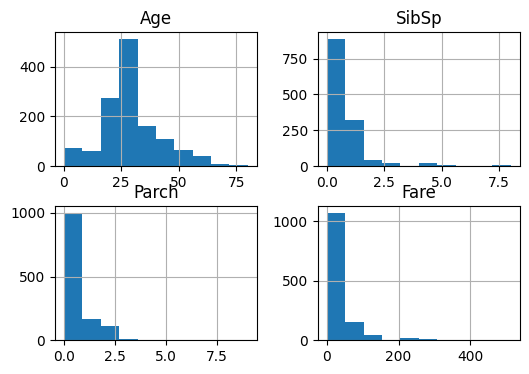

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_variables = newdata1[["Age","SibSp","Parch","Fare"]]
numerical_variables.hist(figsize=(6,4))
plt.show()

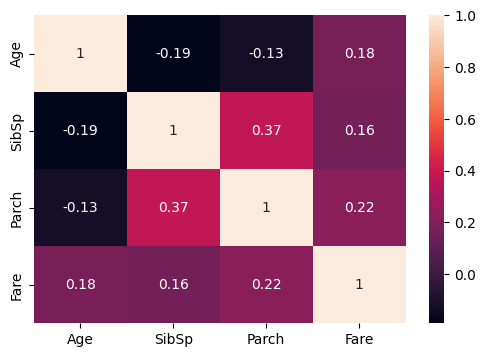

In [30]:
correlation_matrix = numerical_variables.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

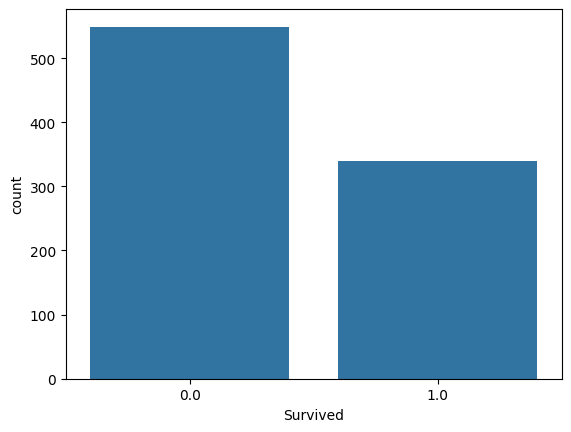

In [31]:
#countplot of survived v/s not survived
# Reset the index of the DataFrame to ensure unique labels
newdata1 = newdata1.reset_index(drop=True)

# Now try plotting again
sns.countplot(x="Survived", data=newdata1)
plt.show()

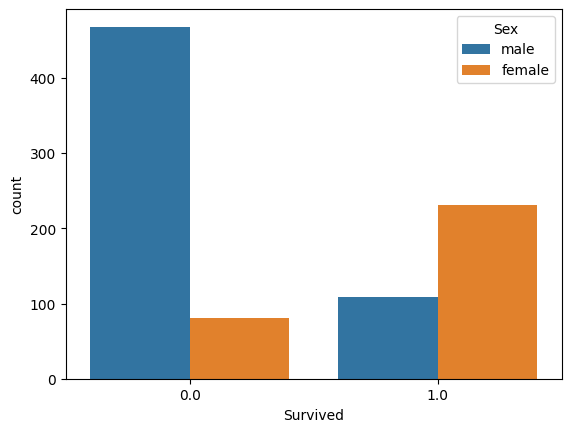

In [32]:
#male v/s female survived ?
sns.countplot(x="Survived",hue="Sex",data=newdata1)
plt.show()

<Axes: >

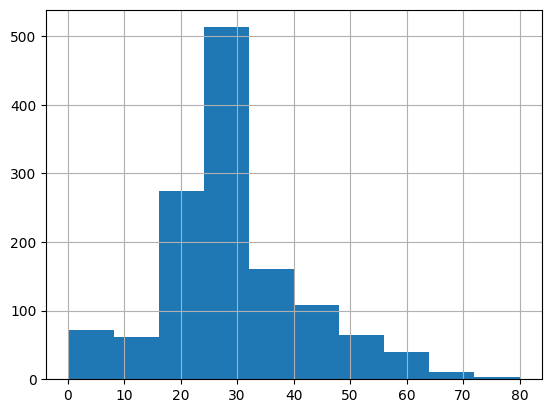

In [33]:
newdata1["Age"].hist()

In [34]:
newdata1["Age"].describe()

,Age
count,1307.000000
mean,29.471821
std,12.881592
min,0.170000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [35]:
#convert sex column to numerical values

gender=pd.get_dummies(newdata1['Sex'],drop_first=True,dtype=int)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
1302,1
1303,0
1304,1
1305,1


In [36]:
newdata1['Gender']=gender

In [37]:
newdata1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [38]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
newdata1[["Age"]] = SS.fit_transform(newdata1[["Age"]])
newdata1[["SibSp"]] = SS.fit_transform(newdata1[["SibSp"]])
newdata1[["Parch"]] = SS.fit_transform(newdata1[["Parch"]])
newdata1[["Fare"]] = SS.fit_transform(newdata1[["Fare"]])

In [39]:
newdata1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,-0.580261,0.480272,-0.445407,A/5 21171,-0.501839,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.662297,0.480272,-0.445407,PC 17599,0.736023,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,-0.269621,-0.479537,-0.445407,STON/O2. 3101282,-0.488790,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.429318,0.480272,-0.445407,113803,0.384512,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,0.429318,-0.479537,-0.445407,373450,-0.486373,S,1,1


In [40]:
#drop the columns whih are not required
#data.drop(data.columns[['Name','Sex','Ticket','Embarked']],axis=1,inplace=True)
newdata1.drop(newdata1.columns[[3,4,8,10]],axis=1,inplace=True)

In [41]:
df_new_train = newdata1[newdata1["code"]==1]
df_new_test = newdata1[newdata1["code"]==0]

In [42]:
df_new_train.shape

(889, 9)

In [43]:
df_new_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
code,0
Gender,0


In [44]:
df_new_test.shape

(418, 9)

In [45]:
x_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_train = df_new_train["Survived"]

In [46]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_test = df_new_test["Survived"]

**XgBOOst Model**

In [47]:
# First XGBoost model for Pima Indians dataset
from xgboost import XGBClassifier

In [48]:
# fit model no training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.50,gamma=0.5, objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [50]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [51]:
y_pred_test = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("accuracy:" ,ac1.round(2) )

accuracy: 0.89


In [53]:
# Predicting Train Set
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

results = pd.DataFrame([['XgBM model', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [54]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,XgBM model,0.892013,0.893548,0.814706,0.852308


**LgBOOst Model**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
!pip install lightgbm

In [57]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [58]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [59]:
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [60]:
x_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_train = df_new_train["Survived"]

In [61]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_test = df_new_test["Survived"]

In [62]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [63]:
y_pred_test = model.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("accuracy:" ,ac1.round(2) )

accuracy: 0.89


Both the models are given better accuracy n=by evaluating and by eda